# Hospital report

In [1]:
from IPython.display import Image
import pandas as pd

from utils.stroke_team_reporting import StrokeTeamReporting

## Set team

Set team and set up reporting object.

In [2]:
team = 'Torbay Hospital'
team_report = StrokeTeamReporting(team)

/home/michael/Current_GitHub/samuel_2_production/utils/stroke_team_reporting.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.years = self.years[0]


## Descriptive statistics

In [3]:
stats = team_report.calculate_descriptive_stats()

all_admission_cols = [x for x in stats if x.endswith('(4hr)') == False]
four_hr_admission_cols = [x for x in stats if x.endswith('(4hr)') == True]

### All admissions

In [4]:
stats[all_admission_cols]

,All teams 1Q,All teams median,All teams 3Q,Torbay Hospital
admissions,419.00,578.00,737.00,454.00
age,73.11,74.84,75.95,76.01
male,0.51,0.53,0.54,0.53
prior_disability,0.87,1.02,1.21,0.99
prior_disability_0-2,0.78,0.81,0.84,0.79
stroke_severity,6.36,7.29,7.88,6.36
onset_known,0.58,0.68,0.75,0.98
onset_to_arrival_time,151.00,175.00,219.00,404.00
onset_within_4hrs,0.35,0.38,0.43,0.41
precise_onset_known,0.27,0.34,0.39,0.39


### Arrivals within 4 hours of known onset

In [5]:
stats[four_hr_admission_cols]

,All teams 1Q (4hr),All teams median (4hr),All teams 3Q (4hr),Torbay Hospital (4hr)
admissions,166.000,220.00,287.00,188.00
age,73.300,74.99,75.98,77.10
male,0.510,0.53,0.54,0.53
prior_disability,0.870,1.02,1.20,1.10
prior_disability_0-2,0.770,0.81,0.83,0.76
stroke_severity,8.250,9.11,9.63,8.36
onset_known,1.000,1.00,1.00,1.00
onset_to_arrival_time,98.000,104.00,110.00,97.00
onset_within_4hrs,1.000,1.00,1.00,1.00
precise_onset_known,0.530,0.65,0.73,0.65


## Show overall improvement possible

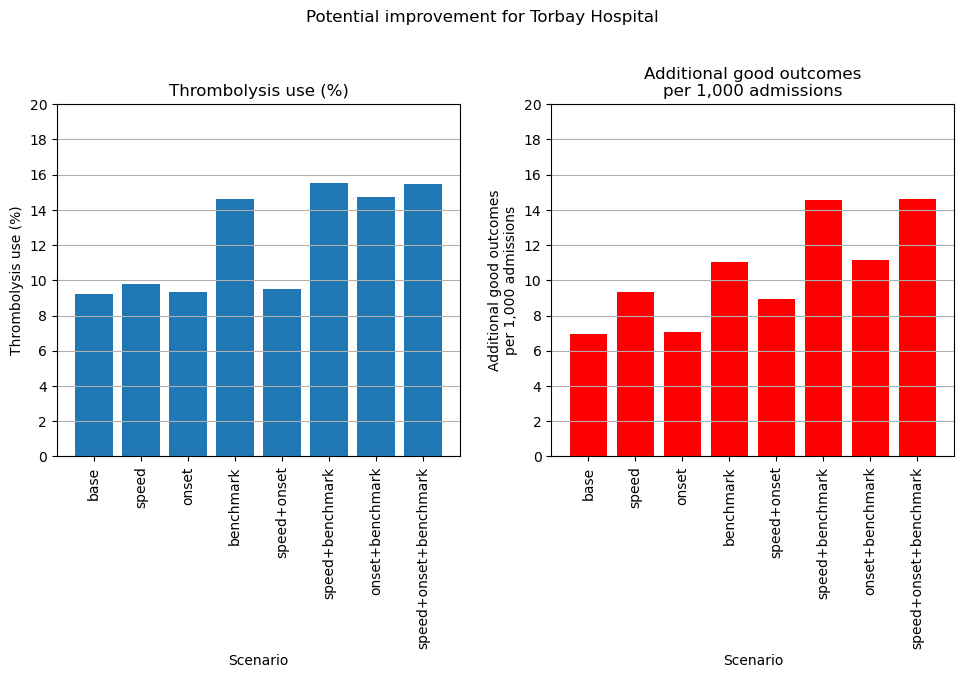

In [6]:
figure = team_report.plot_improvement()

## Show how thrombolysis decisions compare to 25 benchmark hospitals

*Benchmark* hospitals are those 25 hospitals most likely to give most thrombolysis if all hospitals saw the same patients up to (and including) time of scan. These are chosen by looking at the machine leraning model and how the stroke team ID affects the odds of receiving thrombolysis (the stroke team *SHAP* value).

An *ideally thrombolysable patient*:

* Infarction
* 90 mins onset to arrival
* Onset not during sleep
* Precise onset time
* NIHSS 15
* No prior disability
* No use of anticoagulants for atrial fibrillation
* Age 72

*Non-ideal* changes:

* *Late*: Arrival at 3hr 45 min after stroke
* *Mild stroke*: NIHSS 3
* *Prior disability*: mRS 3 before stroke
* *Imprecise*: Imprecisely known stroke onset time
* *Age*: Age 87

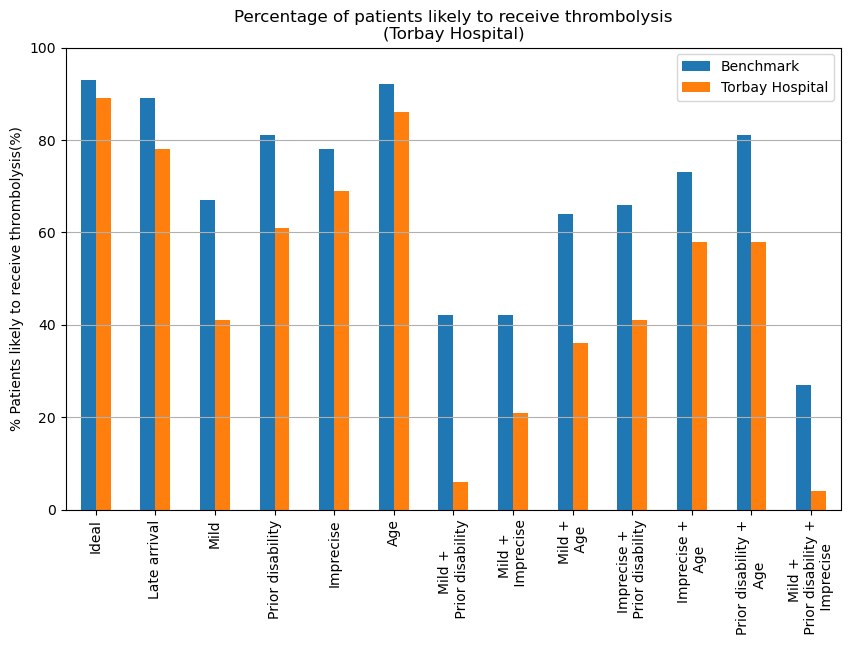

In [7]:
team_report.show_prototype_patients()